In [174]:
import pandas as pd  # data manipulation library
import numpy as np   #scentific computing library
%matplotlib inline
import matplotlib.pyplot as plt # data visualisation libraries
import seaborn as sns
from pandas_profiling import ProfileReport


In [175]:
!pip install calmap
import calmap  #calender heat map library


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [176]:
#  1st step- initial data exploration

df=pd.read_csv("/content/drive/MyDrive/supermarket_sales.csv")

In [177]:
df.head()

,Invoice id,branch,city,customer type,gender,product line,unit price,quantity,tax,total,date,time,payment type,cost of good sold(cogs),gross margin percent,gross income,rating
0,149-71-6266,B,Mandalay,Member,Male,Sports and travel,78.07,9.0,35.1315,737.7615,1/28/19,12:43,Cash,702.63,4.761905,35.1315,4.5
1,640-49-2076,B,Mandalay,Normal,Male,Sports and travel,83.78,8.0,33.5120,703.7520,01/10/2019,14:49,Cash,670.24,4.761905,33.5120,5.1
2,595-11-5460,A,Yangon,NaN,Male,Health and beauty,96.58,2.0,9.6580,202.8180,3/15/19,10:12,Credit card,193.16,4.761905,9.6580,5.1
3,183-56-6882,C,Naypyitaw,NaN,Female,Food and beverages,99.42,4.0,19.8840,417.5640,02/06/2019,10:42,Ewallet,397.68,4.761905,19.8840,7.5
4,232-16-2483,C,Naypyitaw,NaN,Female,Sports and travel,68.12,1.0,3.4060,71.5260,01/07/2019,12:28,Ewallet,68.12,4.761905,3.4060,6.8


In [178]:
df.shape

(972, 17)

In [179]:
df.tail()

,Invoice id,branch,city,customer type,gender,product line,unit price,quantity,tax,total,date,time,payment type,cost of good sold(cogs),gross margin percent,gross income,rating
967,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1.0,3.291,69.111,2/22/19,15:33,Cash,65.82,4.761905,3.291,4.1
968,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.919,649.299,2/18/19,13:28,Cash,618.38,4.761905,30.919,6.6
969,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.919,649.299,2/18/19,13:28,Cash,618.38,4.761905,30.919,6.6
970,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,NaN,2.0,5.803,121.863,03/10/2019,20:46,Ewallet,116.06,4.761905,5.803,8.8
971,452-04-8808,B,Mandalay,Normal,Male,Electronic accessories,87.08,NaN,30.478,640.038,1/26/19,15:17,Cash,609.56,4.761905,30.478,5.5


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice id               972 non-null    object 
 1   branch                   972 non-null    object 
 2   city                     972 non-null    object 
 3   customer type            894 non-null    object 
 4   gender                   972 non-null    object 
 5   product line             933 non-null    object 
 6   unit price               965 non-null    float64
 7   quantity                 952 non-null    float64
 8   tax                      972 non-null    float64
 9   total                    972 non-null    float64
 10  date                     972 non-null    object 
 11  time                     972 non-null    object 
 12  payment type             972 non-null    object 
 13  cost of good sold(cogs)  972 non-null    float64
 14  gross margin percent     9

In [181]:
df.columns

Index(['Invoice id', 'branch', 'city', 'customer type', 'gender',
       'product line', 'unit price', 'quantity', 'tax', 'total', 'date',
       'time', 'payment type', 'cost of good sold(cogs)',
       'gross margin percent', 'gross income', 'rating'],
      dtype='object')

In [182]:
df.dtypes

Invoice id                  object
branch                      object
city                        object
customer type               object
gender                      object
product line                object
unit price                 float64
quantity                   float64
tax                        float64
total                      float64
date                        object
time                        object
payment type                object
cost of good sold(cogs)    float64
gross margin percent       float64
gross income               float64
rating                     float64
dtype: object

In [183]:
df['date']

0         1/28/19
1      01/10/2019
2         3/15/19
3      02/06/2019
4      01/07/2019
          ...    
967       2/22/19
968       2/18/19
969       2/18/19
970    03/10/2019
971       1/26/19
Name: date, Length: 972, dtype: object

In [184]:
df['date']=pd.to_datetime(df['date'])

In [185]:
df['date']

0     2019-01-28
1     2019-01-10
2     2019-03-15
3     2019-02-06
4     2019-01-07
         ...    
967   2019-02-22
968   2019-02-18
969   2019-02-18
970   2019-03-10
971   2019-01-26
Name: date, Length: 972, dtype: datetime64[ns]

In [186]:
df.dtypes # date column data type convert from object(string) to datetime64

Invoice id                         object
branch                             object
city                               object
customer type                      object
gender                             object
product line                       object
unit price                        float64
quantity                          float64
tax                               float64
total                             float64
date                       datetime64[ns]
time                               object
payment type                       object
cost of good sold(cogs)           float64
gross margin percent              float64
gross income                      float64
rating                            float64
dtype: object

In [187]:
df.set_index('date',inplace=True) # making date as index column (first column)

In [188]:
df.head()

,Invoice id,branch,city,customer type,gender,product line,unit price,quantity,tax,total,time,payment type,cost of good sold(cogs),gross margin percent,gross income,rating
date,,,,,,,,,,,,,,,,
2019-01-28,149-71-6266,B,Mandalay,Member,Male,Sports and travel,78.07,9.0,35.1315,737.7615,12:43,Cash,702.63,4.761905,35.1315,4.5
2019-01-10,640-49-2076,B,Mandalay,Normal,Male,Sports and travel,83.78,8.0,33.5120,703.7520,14:49,Cash,670.24,4.761905,33.5120,5.1
2019-03-15,595-11-5460,A,Yangon,NaN,Male,Health and beauty,96.58,2.0,9.6580,202.8180,10:12,Credit card,193.16,4.761905,9.6580,5.1
2019-02-06,183-56-6882,C,Naypyitaw,NaN,Female,Food and beverages,99.42,4.0,19.8840,417.5640,10:42,Ewallet,397.68,4.761905,19.8840,7.5
2019-01-07,232-16-2483,C,Naypyitaw,NaN,Female,Sports and travel,68.12,1.0,3.4060,71.5260,12:28,Ewallet,68.12,4.761905,3.4060,6.8


In [189]:
df.describe() # giving summary statistics of all numeric columns

,unit price,quantity,tax,total,cost of good sold(cogs),gross margin percent,gross income,rating
count,965.000000,952.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000
mean,55.646093,5.505252,15.366447,322.366410,307.328930,4.761905,15.366447,6.982099
std,26.564106,2.936763,11.759974,247.164264,235.199487,0.000000,11.759974,1.715738
min,10.080000,1.000000,0.508500,9.000000,10.170000,4.761905,0.508500,4.000000
25%,32.620000,3.000000,5.833875,122.319750,116.677500,4.761905,5.833875,5.500000
50%,55.390000,5.000000,12.066000,253.134000,241.320000,4.761905,12.066000,7.000000
75%,77.950000,8.000000,22.445250,471.350250,448.905000,4.761905,22.445250,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905,49.650000,10.000000


In [190]:
# univariate analysis- analyis of single  variable
#for numeric features.use histogram
# for categorical features use barchart
#for barchart there is gap between each.but in histogram no gap

In [191]:
#what does distribution of customer ratings looks like??is it skewed?

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


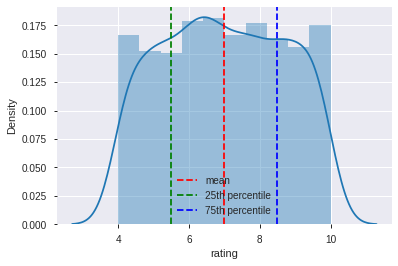

In [192]:
sns.distplot(df['rating'])
plt.axvline(x=np.mean(df['rating']),color='red',linestyle='--',label='mean')
plt.axvline(x=np.percentile(df['rating'],25),color='green',linestyle='--',label='25th percentile')
plt.axvline(x=np.percentile(df['rating'],75),color='blue',linestyle='--',label='75th percentile')
plt.legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b87f180a0>,
      dtype=object)

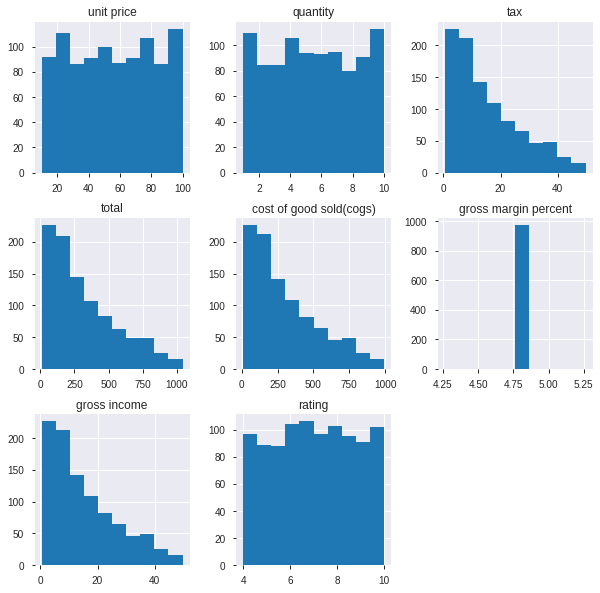

In [193]:
df.hist(figsize=(10,10))


In [194]:
#Do the aggregate sales no differ between the branches?


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


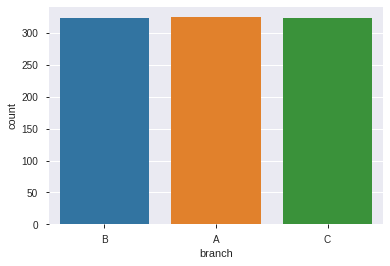

In [195]:
sns.countplot(df['branch'])

In [196]:
df['branch'].value_counts()

A    325
C    324
B    323
Name: branch, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


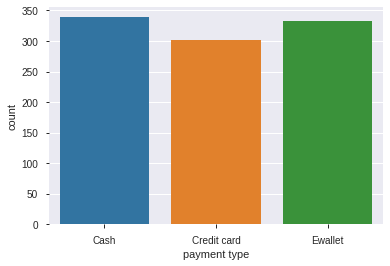

In [197]:
sns.countplot(df['payment type'])

In [198]:
df['payment type'].value_counts()

Cash           339
Ewallet        332
Credit card    301
Name: payment type, dtype: int64

In [199]:
#Bivariate  Analysis-analysis of more than one variable

In [200]:
#relationship between two numeric variables in seaborn is scatterplot
#relationship between one numeric and one categorical variable in seaborn is boxplot

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


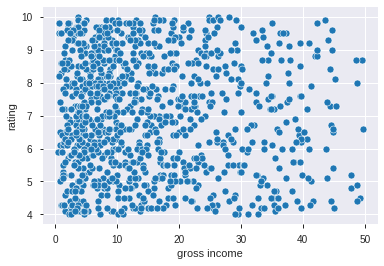

In [201]:
#relationship between gross income and custom ratings
#wen we plot scatter plot there is no relationship shown between gross income n ratings
#next step is marking trend line also

sns.scatterplot(df['gross income'],df['rating'])


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


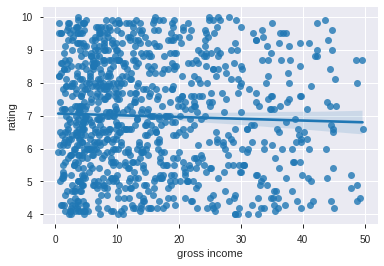

In [202]:
sns.regplot(df['gross income'],df['rating']) # regression plot to mark the trend line

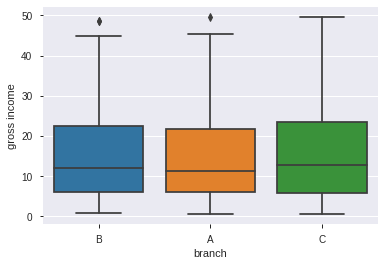

In [203]:
#relationship between branch and gross income


sns.boxplot(x=df['branch'], y=df['gross income'])

In [204]:
# there is no much relationship between those two above variables

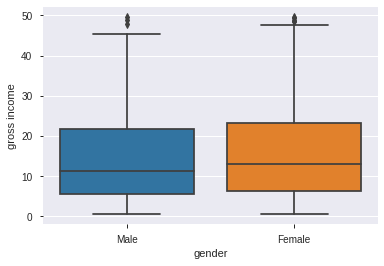

In [205]:
#relationship between gender and gross income

sns.boxplot(x=df['gender'], y=df['gross income'])



In [206]:
#conclusions from above figure
# male n female in datasets spend almost same
#75 percentile female spent than men

In [207]:
#Is there any noticeable time trend in gross income??
# for time trend,use lin plot in seaborn

df.head()

,Invoice id,branch,city,customer type,gender,product line,unit price,quantity,tax,total,time,payment type,cost of good sold(cogs),gross margin percent,gross income,rating
date,,,,,,,,,,,,,,,,
2019-01-28,149-71-6266,B,Mandalay,Member,Male,Sports and travel,78.07,9.0,35.1315,737.7615,12:43,Cash,702.63,4.761905,35.1315,4.5
2019-01-10,640-49-2076,B,Mandalay,Normal,Male,Sports and travel,83.78,8.0,33.5120,703.7520,14:49,Cash,670.24,4.761905,33.5120,5.1
2019-03-15,595-11-5460,A,Yangon,NaN,Male,Health and beauty,96.58,2.0,9.6580,202.8180,10:12,Credit card,193.16,4.761905,9.6580,5.1
2019-02-06,183-56-6882,C,Naypyitaw,NaN,Female,Food and beverages,99.42,4.0,19.8840,417.5640,10:42,Ewallet,397.68,4.761905,19.8840,7.5
2019-01-07,232-16-2483,C,Naypyitaw,NaN,Female,Sports and travel,68.12,1.0,3.4060,71.5260,12:28,Ewallet,68.12,4.761905,3.4060,6.8


In [208]:
df.groupby(df.index).mean()

,unit price,quantity,tax,total,cost of good sold(cogs),gross margin percent,gross income,rating
date,,,,,,,,
2019-01-01,53.394545,6.500000,18.561636,389.794364,371.232727,4.761905,18.561636,6.554545
2019-01-02,44.635000,6.000000,11.580375,243.187875,231.607500,4.761905,11.580375,6.050000
2019-01-03,59.457500,4.625000,12.369813,259.766062,247.396250,4.761905,12.369813,8.112500
2019-01-04,51.743333,5.333333,12.886417,270.614750,257.728333,4.761905,12.886417,6.516667
2019-01-05,60.450000,4.363636,12.933818,271.610182,258.676364,4.761905,12.933818,7.281818
...,...,...,...,...,...,...,...,...
2019-03-26,42.972308,4.000000,7.188692,150.962538,143.773846,4.761905,7.188692,6.623077
2019-03-27,56.841000,4.500000,13.822950,290.281950,276.459000,4.761905,13.822950,6.760000
2019-03-28,45.525000,4.800000,10.616200,222.940200,212.324000,4.761905,10.616200,7.050000


In [209]:
df.groupby(df.index).mean().index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
               '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20',
               '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24',
               '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-02', '2019-02-03', '2019-02-04', '2019-02-05',
               '2019-02-06', '2019-02-07', '2019-02-08', '2019-02-09',
               '2019-02-10', '2019-02-11', '2019-02-12', '2019-02-13',
               '2019-02-14', '2019-02-15', '2019-02-16', '2019-02-17',
               '2019-02-18', '2019-02-19', '2019-02-20', '2019-02-21',
               '2019-02-22', '2019-02-23', '2019-02-24', '2019-02-25',
      

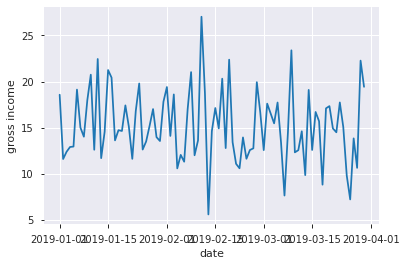

In [210]:

sns.lineplot(x=df.groupby(df.index).mean().index,y=df.groupby(df.index).mean()['gross income'])
sns.set(rc={"figure.figsize":(5, 2)})

In [211]:
#there is no much trend in above figure.more on one day..then less on other day,...no trendy features noticed

In [212]:
#dealing with duplicate rows and missing values

df.duplicated()

date
2019-01-28    False
2019-01-10    False
2019-03-15    False
2019-02-06    False
2019-01-07    False
              ...  
2019-02-22    False
2019-02-18    False
2019-02-18     True
2019-03-10     True
2019-01-26     True
Length: 972, dtype: bool

In [213]:
df.duplicated().sum()

3

In [214]:
df[df.duplicated()==True] # these paricular rows are repeated more than once in our data set.

,Invoice id,branch,city,customer type,gender,product line,unit price,quantity,tax,total,time,payment type,cost of good sold(cogs),gross margin percent,gross income,rating
date,,,,,,,,,,,,,,,,
2019-02-18,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.919,649.299,13:28,Cash,618.38,4.761905,30.919,6.6
2019-03-10,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,NaN,2.0,5.803,121.863,20:46,Ewallet,116.06,4.761905,5.803,8.8
2019-01-26,452-04-8808,B,Mandalay,Normal,Male,Electronic accessories,87.08,NaN,30.478,640.038,15:17,Cash,609.56,4.761905,30.478,5.5


In [215]:
df.drop_duplicates(inplace=True) # it removes all duplicate rows. inplace =true means this change is permanently happenend to data set

In [216]:
df.duplicated().sum()

0

In [217]:
# Handling missing values

df.isna().sum()


Invoice id                  0
branch                      0
city                        0
customer type              78
gender                      0
product line               39
unit price                  6
quantity                   19
tax                         0
total                       0
time                        0
payment type                0
cost of good sold(cogs)     0
gross margin percent        0
gross income                0
rating                      0
dtype: int64

In [218]:
df.isna().sum()/len(df)  # to get ratio of missing values, eg .8% of customer type values are missing

Invoice id                 0.000000
branch                     0.000000
city                       0.000000
customer type              0.080495
gender                     0.000000
product line               0.040248
unit price                 0.006192
quantity                   0.019608
tax                        0.000000
total                      0.000000
time                       0.000000
payment type               0.000000
cost of good sold(cogs)    0.000000
gross margin percent       0.000000
gross income               0.000000
rating                     0.000000
dtype: float64

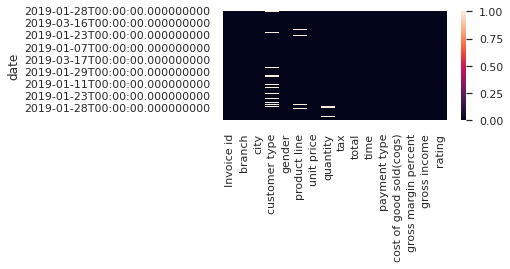

In [219]:
# to visualise missing values in seaborn use heatmap
sns.heatmap(df.isna())

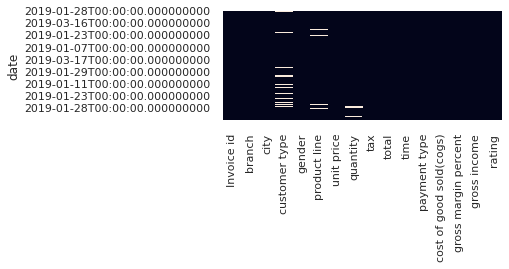

In [220]:
sns.heatmap(df.isna(),cbar=False)

In [221]:
# to handling missing value of numeric columns ,fill with zero or fill with mean ..usind fillna()

df.fillna(df.mean(),inplace=True)

<ipython-input-221-c6212be748dd>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(),inplace=True)


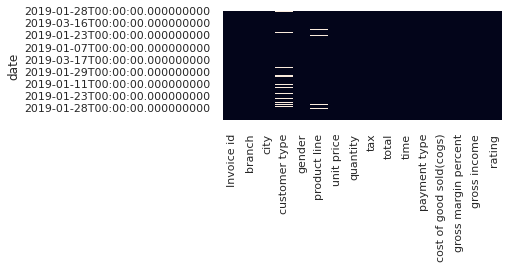

In [222]:
sns.heatmap(df.isna(),cbar=False) # unit price and quantity columns are filled with mean values.

In [223]:
# to handling missing value of categorical columns ,fill with mode ..using fillna()

df.mode()

,Invoice id,branch,city,customer type,gender,product line,unit price,quantity,tax,total,time,payment type,cost of good sold(cogs),gross margin percent,gross income,rating
0,101-17-6199,C,Naypyitaw,Normal,Female,Fashion accessories,55.579502,10.0,4.1540,87.2340,14:42,Cash,83.08,4.761905,4.1540,6.0
1,101-81-4070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.4640,93.7440,NaN,NaN,89.28,NaN,4.4640,NaN
2,102-06-2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.3770,175.9170,NaN,NaN,167.54,NaN,8.3770,NaN
3,102-77-2261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0045,189.0945,NaN,NaN,180.09,NaN,9.0045,NaN
4,105-10-6182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.3260,216.8460,NaN,NaN,206.52,NaN,10.3260,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,894-41-5205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
965,895-03-6665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
966,895-66-0685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
967,896-34-0956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [224]:
df.mode().iloc[0]

Invoice id                         101-17-6199
branch                                       C
city                                 Naypyitaw
customer type                           Normal
gender                                  Female
product line               Fashion accessories
unit price                           55.579502
quantity                                  10.0
tax                                      4.154
total                                   87.234
time                                     14:42
payment type                              Cash
cost of good sold(cogs)                  83.08
gross margin percent                  4.761905
gross income                             4.154
rating                                     6.0
Name: 0, dtype: object

In [238]:
df.fillna(df.mode().iloc[0],inplace=True)  # replacing missing values of categorical columns by mode.

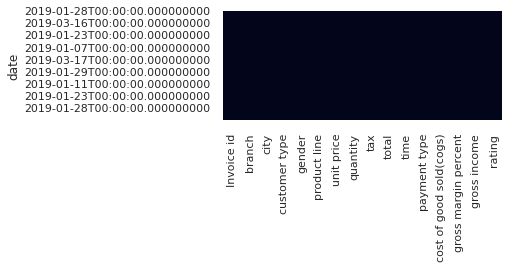

In [226]:
sns.heatmap(df.isna(),cbar=False)

In [235]:
#Correlation Analysis - helps to understand relationship between two variables

np.corrcoef(df['gross income'],df['rating'])


array([[ 1.        , -0.03477946],
       [-0.03477946,  1.        ]])

In [236]:
round(np.corrcoef(df['gross income'],df['rating'])[1][0],2)

-0.03

In [239]:
df.corr()

,unit price,quantity,tax,total,cost of good sold(cogs),gross margin percent,gross income,rating
unit price,1.000000,0.011624,0.627407,0.626531,0.627407,NaN,0.627407,0.001634
quantity,0.011624,1.000000,0.702637,0.702287,0.702637,NaN,0.702637,-0.027751
tax,0.627407,0.702637,1.000000,0.999135,1.000000,NaN,1.000000,-0.034779
total,0.626531,0.702287,0.999135,1.000000,0.999135,NaN,0.999135,-0.034765
cost of good sold(cogs),0.627407,0.702637,1.000000,0.999135,1.000000,NaN,1.000000,-0.034779
gross margin percent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.627407,0.702637,1.000000,0.999135,1.000000,NaN,1.000000,-0.034779
rating,0.001634,-0.027751,-0.034779,-0.034765,-0.034779,NaN,-0.034779,1.000000


In [240]:
np.round(df.corr(),2)

,unit price,quantity,tax,total,cost of good sold(cogs),gross margin percent,gross income,rating
unit price,1.00,0.01,0.63,0.63,0.63,NaN,0.63,0.00
quantity,0.01,1.00,0.70,0.70,0.70,NaN,0.70,-0.03
tax,0.63,0.70,1.00,1.00,1.00,NaN,1.00,-0.03
total,0.63,0.70,1.00,1.00,1.00,NaN,1.00,-0.03
cost of good sold(cogs),0.63,0.70,1.00,1.00,1.00,NaN,1.00,-0.03
gross margin percent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.63,0.70,1.00,1.00,1.00,NaN,1.00,-0.03
rating,0.00,-0.03,-0.03,-0.03,-0.03,NaN,-0.03,1.00


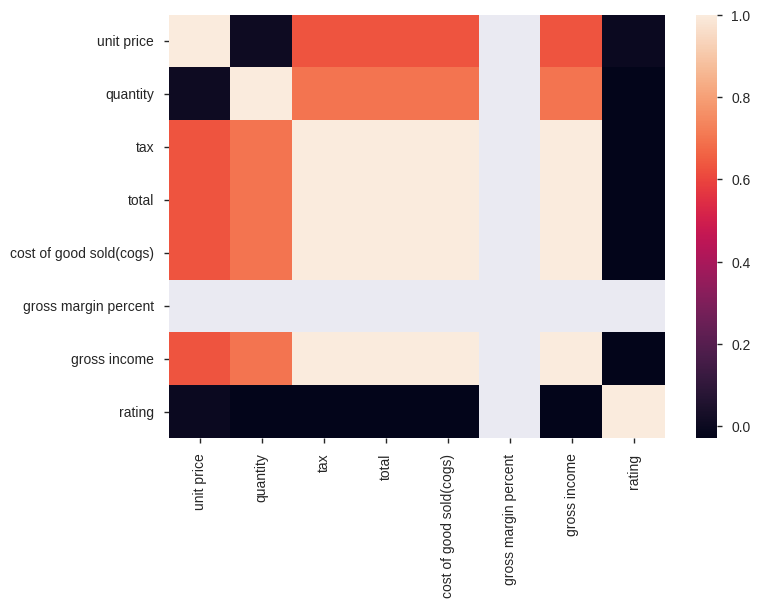

In [241]:
sns.heatmap(np.round(df.corr(),2))

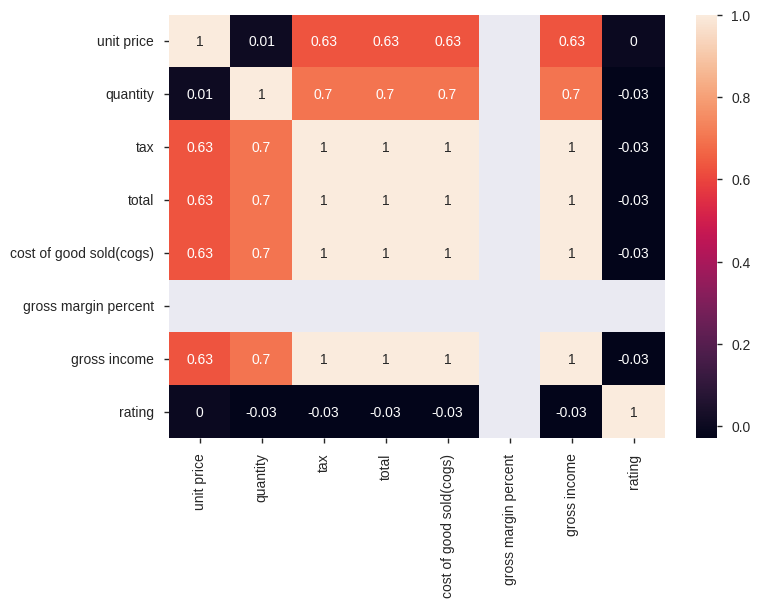

In [242]:
sns.heatmap(np.round(df.corr(),2),annot=True)